# 2. Matplotlib란?

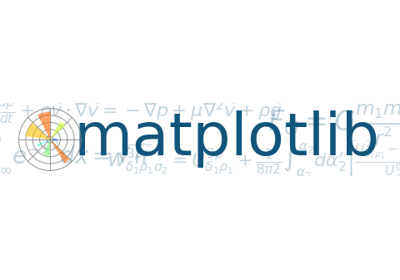

matplotlib은 다양한 데이터를 많은 방법으로 도식화 할 수 있도록 하는 파이썬 라이브러리로써, 우리는 matplotlib의 pyplot을 이용하게 됩니다.
이는 mathworks에서 개발한 매트랩(MATLAB)과 비슷한 형태를 가지고 있습니다.<br>
matplotlib을 이용하면 우리가 이전에 알아본 numpy나 pandas에서 사용되는 자료구조를 쉽게 시각화 할 수 있습니다.<br>
matplotlib을 사용하기 위해서는 먼저 matplotlib을 설치하고 아래와 같이 import를 해주어야 합니다.<br>


import matplotlib
import matplotlib.pyplot as plt

또한 jupyter notebook에서 그래프를 제대로 확인하기 위해서는 아래와 같은 매직 커맨드를 작성해주셔야 합니다.<br>

%matplotlib inline

이러한 매직커맨드는 맨 뒤에 inline 이외에도 우리가 아래에서 사용하는 nbagg 등의 다양한 속성이 있습니다.

In [15]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

# 2. Plot의 종류

## 2.1 Line plot 그리기

In [16]:
# Series를 통한 line plot 그리기
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     0.626856
10    2.127017
20    3.198714
30    3.451919
40    3.837089
50    5.152132
60    4.966519
70    4.476647
80    3.970936
90    4.121148
dtype: float64

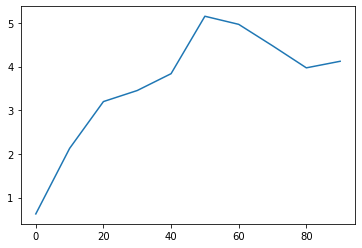

In [17]:
# 위에서 정의한 s라는 시리즈에 대해서 line plot을 그리고 싶다면?
s.plot()

s 라는 Series에서의 index와 value를 통해 그래프가 그려졌다.<br>
그래프 우측상단의 전원버튼을 누르기 전까지 우리는 해당 그래프를 interactive하게 조작할 수 있다.

In [18]:
# DataFrame을 통한 line plot 그리기
df = pd.DataFrame(np.random.randn(10, 4).cumsum(axis=0),
                  columns=["A", "B", "C", "D"],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,0.746023,-0.921885,-0.979672,1.364758
10,1.139833,-0.396619,-2.242782,1.209799
20,0.276670,-1.621034,-3.905244,1.595014
30,1.583078,-1.975817,-4.707822,3.199091
40,1.463349,-1.647870,-5.043814,2.508819
50,0.513238,-0.192695,-5.655945,2.339675
60,0.060741,-2.201004,-3.135186,2.602704
70,-1.434486,-2.973086,-1.803530,1.792105
80,0.075129,-2.676985,-1.133904,2.853542
90,-0.271970,-2.095641,-1.126399,4.550401


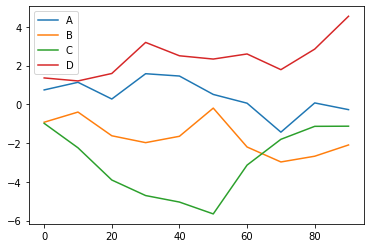

In [19]:
df.plot()

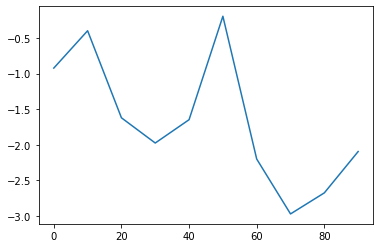

In [20]:
# 하나의 열에 대해서만 보고 싶다면?
df['B'].plot()

## 2.2 Bar plot 그리기

In [21]:
s2 = pd.Series(np.random.rand(16), index=list("abcdefghijklmnop"))
s2

a    0.044108
b    0.679103
c    0.683985
d    0.798643
e    0.989139
f    0.347355
g    0.683505
h    0.465990
i    0.564600
j    0.122472
k    0.318857
l    0.034325
m    0.414757
n    0.491971
o    0.532196
p    0.137304
dtype: float64

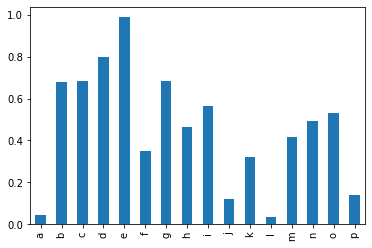

In [22]:
s2.plot(kind='bar')

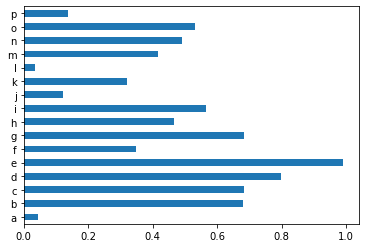

In [23]:
# 가로방향의 bar plot그리기
s2.plot(kind='barh')

In [24]:
df2 = pd.DataFrame(np.random.rand(6, 4), 
                   index=["one", "two", "three", "four", "five", "six"],
                   columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df2

Genus,A,B,C,D
one,0.290449,0.911498,0.261651,0.510962
two,0.516067,0.189163,0.996803,0.973844
three,0.229840,0.675255,0.539788,0.867173
four,0.476667,0.049294,0.861710,0.895264
five,0.323325,0.089452,0.064924,0.192074
six,0.374534,0.468865,0.634794,0.475811


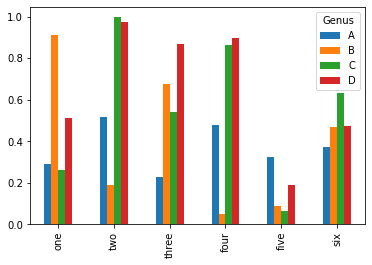

In [25]:
df2.plot(kind='bar')

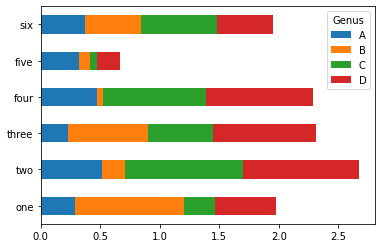

In [26]:
# 아래와 같이 Stacked 속성을 True로 설정하면, 하나의 인덱스에 대한 각 열의 값을 한줄로 쌓아서 나타내준다.

df2.plot(kind='barh', stacked=True)

## 2.3 Histgram 그리기

In [27]:
# histogram은 index가 필요없다.
s3 = pd.Series(np.random.normal(0, 1, size=200))
s3

0      0.582671
1      0.632794
2      0.391978
3      0.897992
4      1.008515
         ...   
195    1.619475
196    0.586980
197    1.154804
198    0.883406
199   -1.299315
Length: 200, dtype: float64

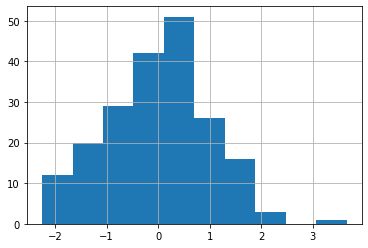

In [28]:
s3.hist()

x 축의 구간 개수를 bin이라고 한다.<br>
이를 직접 설정할 수도 있다

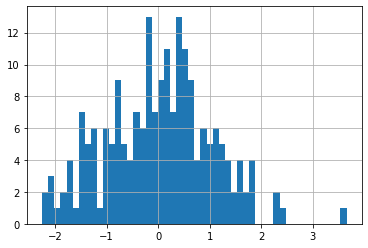

In [29]:
s3.hist(bins=50)

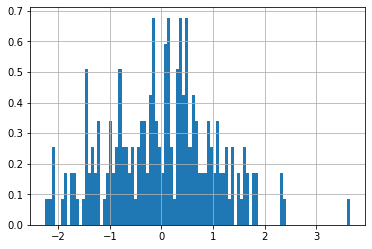

In [30]:
s3.hist(bins=100, density=True)
# density 속성을 True로 설정하면, 각 bin에 속하는 개수를 전체 개수로 나눈 비율, 즉 정규화 한 값을 bar의 높이로 사용하게 된다.

## 2.4 산점도(Scatter plot) 그리기
산점도의 경우에는 서로 다른 두 개의 독립변수에 대해 두 변수가 어떤 관계가 있는지 살펴보기 위해 사용된다.

In [31]:
x1 = np.random.normal(1, 1, size=(100, 1))
x2 = np.random.normal(-2, 4, size=(100, 1))
X = np.concatenate((x1, x2), axis=1)
X

array([[-1.39189230e+00, -1.79209163e+00],
       [ 1.84584607e-01, -3.81538726e+00],
       [ 4.02628158e-01, -4.91737415e+00],
       [ 2.13631326e+00, -1.35914554e-01],
       [ 7.01827434e-01, -5.89411210e+00],
       [-1.12039968e+00,  3.89444547e+00],
       [ 9.87585717e-01, -5.44482504e+00],
       [ 2.24251031e+00, -1.02368326e+01],
       [ 9.21379400e-01, -2.87618252e+00],
       [ 8.68998091e-01, -8.32487864e+00],
       [ 1.48050861e+00, -1.63443478e+00],
       [ 9.77394495e-01,  1.81284259e+00],
       [-1.20058709e-01, -2.22135892e+00],
       [ 1.88174183e+00, -1.65918415e+00],
       [ 2.41975237e+00,  1.14874200e+00],
       [ 1.80077798e+00, -4.16275045e+00],
       [ 1.58022866e+00, -2.07239138e+00],
       [-1.23889352e+00, -6.84808919e+00],
       [ 4.78446924e-01, -7.53795787e+00],
       [-3.25795990e-01, -7.44493359e+00],
       [ 2.01672145e+00,  5.89304867e+00],
       [ 1.73418333e+00, -2.77059309e+00],
       [ 3.18492915e+00,  7.64205528e-02],
       [ 1.

In [32]:
df3 = pd.DataFrame(X, columns=["x1", "x2"])
df3

,x1,x2
0,-1.391892,-1.792092
1,0.184585,-3.815387
2,0.402628,-4.917374
3,2.136313,-0.135915
4,0.701827,-5.894112
...,...,...
95,2.183498,2.865806
96,2.023781,-4.751635
97,0.602579,-7.245418
98,0.836845,-0.387075


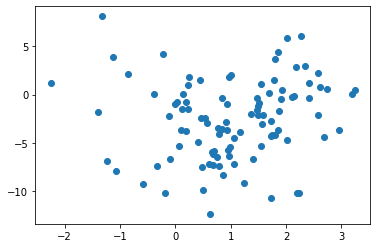

In [33]:
plt.scatter(df3['x1'], df3['x2']) # x1이 x축, x2가 y축

# 3. Plot 모양 변형하기

<IPython.core.display.Javascript object>


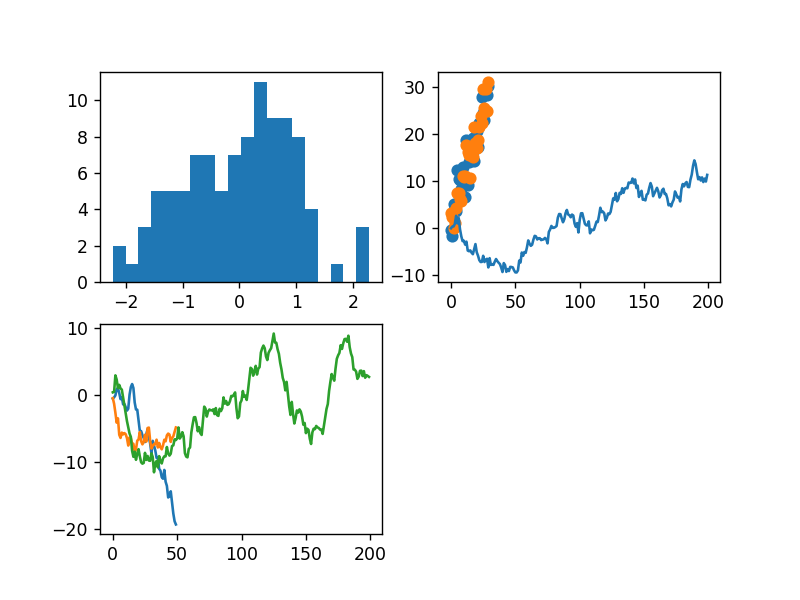

In [45]:
%matplotlib nbagg
fig = plt.figure()
# 비어있는 figure가 생성된다.

In [42]:
# subplot 추가하기, add_subplot 에는 총 3가지 인자가 들어간다.

In [46]:
ax1 = fig.add_subplot(2, 2, 1)

첫번째 숫자와 두번째 숫자 : 우리가 figure를 어떤 크기로 나눌지에 대한 값이다. <br>
즉 위의 같은 경우는 2,2 이므로 우리의 figure를 2x2로 나눈다는 뜻.<br>
세번째 숫자 : 첫번째, 두번째 숫자로 나눈 figure에서 좌측상단으로 우측방향으로 숫자가 붙는다. <br>
이때 우리가 add하고자 하는 subplot이 몇번째에 들어가는지를 나타낸다.<br>
즉, 위와 같은 경우 figure는 다음과 같이 나누어진다.<br>
1  2<br>
3  4<br>
이때 우리는 1위치에 subplot을 추가하고 해당 subplot을 ax1이라는 변수로 반환받는다.

In [50]:
ax2 = fig.add_subplot(2,2,2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


In [52]:
ax3 = fig.add_subplot(2,2,3)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """Entry point for launching an IPython kernel.


In [53]:
plt.plot(np.random.randn(50).cumsum())
# 위치를 지정하지 않고 plot을 그리니 맨마지막에 그림이 그려진다.
# figure에 추가된 subplot상 맨 마지막에 위치한 곳에 그려지는 것이 아니라, 제일 마지막에 추가한 subplot에 그려진다.
# 2 -> 3 -> 1 순으로 subplot을 추가하여 테스트 해보면 1번 요소에 그려진다.

In [54]:
plt.plot(np.random.randn(200).cumsum())
# 한번더 위치 지정 없이 그리면 그 전의 요소에 그려진다고 했는데,
# 실제로 진행해보면 그냥 위의 것과 똑같이 제일 마지막에 추가한 subplot에 중복되서 그려진다.

In [55]:
# 그럼 우리가 원하는 위치에 그림을 그리기 위해서는?
# 위에서 add_subplot 을 할때 변수명을 지정하여 반환값을 받았다.
# 해당 변수를 통해 plot을 그리면 된다.
ax1.hist(np.random.randn(100), bins = 20) # bins는 x축 bar의 개수

(array([ 2.,  1.,  3.,  5.,  5.,  5.,  7.,  7.,  5.,  7.,  8., 11.,  9.,
         9.,  8.,  4.,  0.,  1.,  0.,  3.]),
 array([-2.22660194, -2.0012039 , -1.77580586, -1.55040782, -1.32500977,
        -1.09961173, -0.87421369, -0.64881564, -0.4234176 , -0.19801956,
         0.02737849,  0.25277653,  0.47817457,  0.70357261,  0.92897066,
         1.1543687 ,  1.37976674,  1.60516479,  1.83056283,  2.05596087,
         2.28135891]),
 <a list of 20 Patch objects>)

In [58]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

<IPython.core.display.Javascript object>


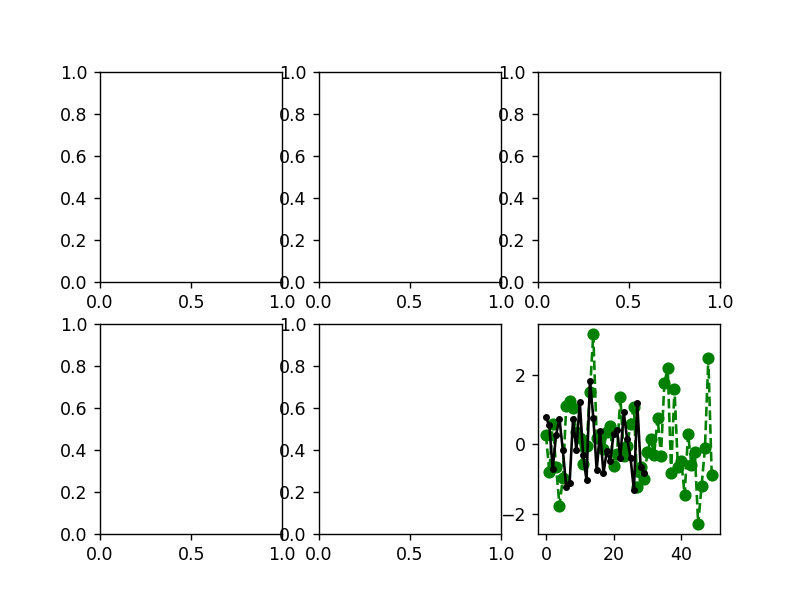

In [59]:
# 또 다른 방법
fig, axes = plt.subplots(2,3)
# 위와 같이 만들면 2x3 subplot들을 가지는 figure를 만드는 것
# 이때 반환되는 값은 2개로써, figrue 자체와, 축

In [60]:
# 반환받은 axes에는 우리가 위에서 설정한 크기와 같은 shape의 리스트로 각 요소에는 subplot 객체가 들어있다.
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020B6ABF6888>,
      dtype=object)

# 3-1. Plot 꾸미기

In [61]:
plt.plot(np.random.randn(50), color = 'g', marker='o', linestyle='--')

### color
    값 색상
    "b" blue
    "g" green
    "r" red
    "c" cyan
    "m" magenta
    "y" yellow
    "k" black
    "w" white

### marker
    값 마킹
    "." point
    "," pixel
    "o" circle
    "v" triangle_down
    "^" triangle_up
    "<" triangle_left    
    ">" triangle_right
    "8" octagon
    "s" square    
    "p" pentagon
    "*" star
    "h" hexagon
    "+" plus
    "x" x
    "D" diamond

### line style
    값 라인 스타일
    "-" solid line
    "--" dashed line
    "-." dash-dotted line
    ":" dotted line
    "None" draw nothing

In [62]:
# 굳이 각각에 대해서 언급해주지 않고, 아래와 같이 연속적으로 나타내줘도 된다.
plt.plot(np.random.randn(30), 'k.-')

<IPython.core.display.Javascript object>


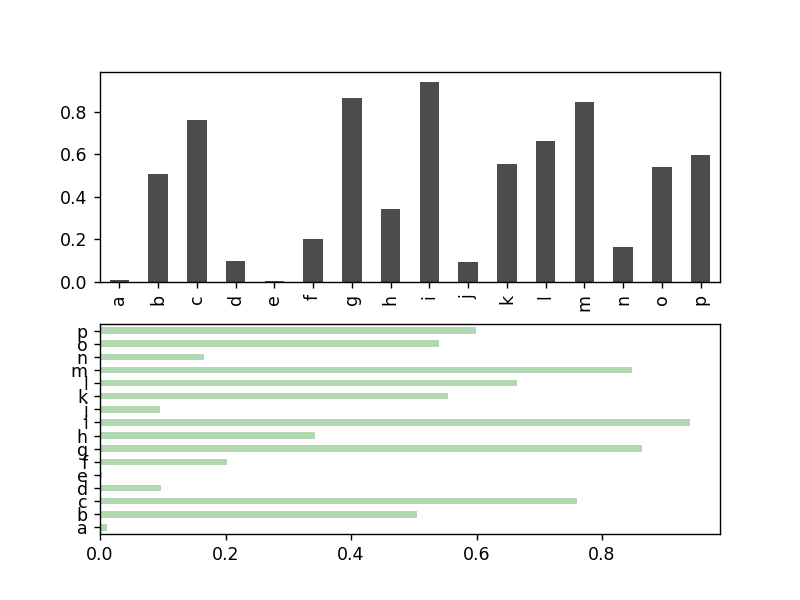

In [63]:
fig, axes = plt.subplots(2,1)

In [64]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

In [65]:
data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7) #plot 함수를 그릴때, figure에서 원하는 위치를 지정하기 위해 ax 속성을 사용

In [66]:
data.plot(kind='barh', ax=axes[1], color='g', alpha=0.3)

우리가 만들 plot의 눈금, 레이블, 범위 등을 지정 및 수정할 수 있다.

<IPython.core.display.Javascript object>


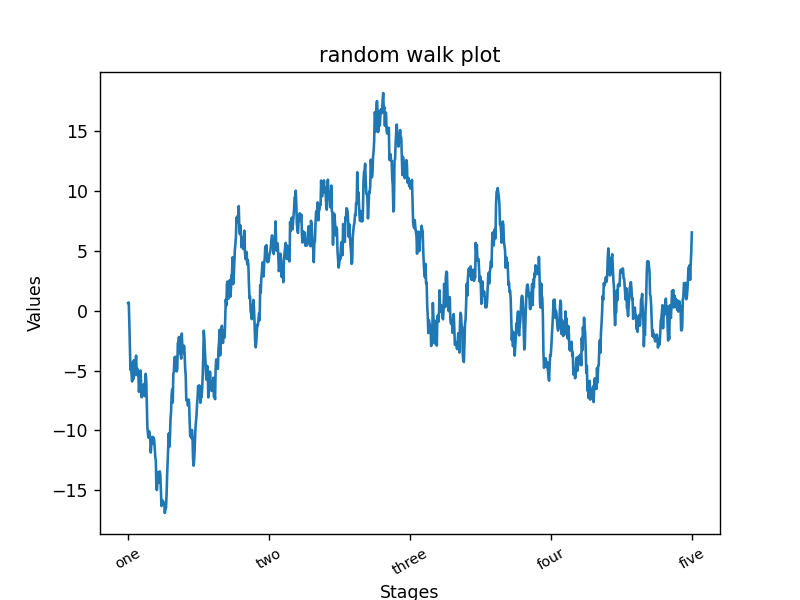

In [67]:
fig = plt.figure()

In [68]:
ax = fig.add_subplot(1,1,1)

In [69]:
ax.plot(np.random.randn(1000).cumsum())

이때 그래프에서 나타내는 눈금을 tick이라고 한다.<br>
즉, 위의 그래프의 x tick은 200이고 y tick은 10이다.

In [70]:
ax.set_xticks([0, 250, 500, 750, 1000])

In [71]:
# 눈금을 문자로 하기 위해서는?
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation = 30, fontsize='small')

In [72]:
# 제목 입력하기
ax.set_title('random walk plot')

Text(0.5, 1.0, 'random walk plot')

In [73]:
# 라벨 입력하기
ax.set_xlabel('Stages')
ax.set_ylabel('Values')

Text(44.402777777777786, 0.5, 'Values')

<IPython.core.display.Javascript object>


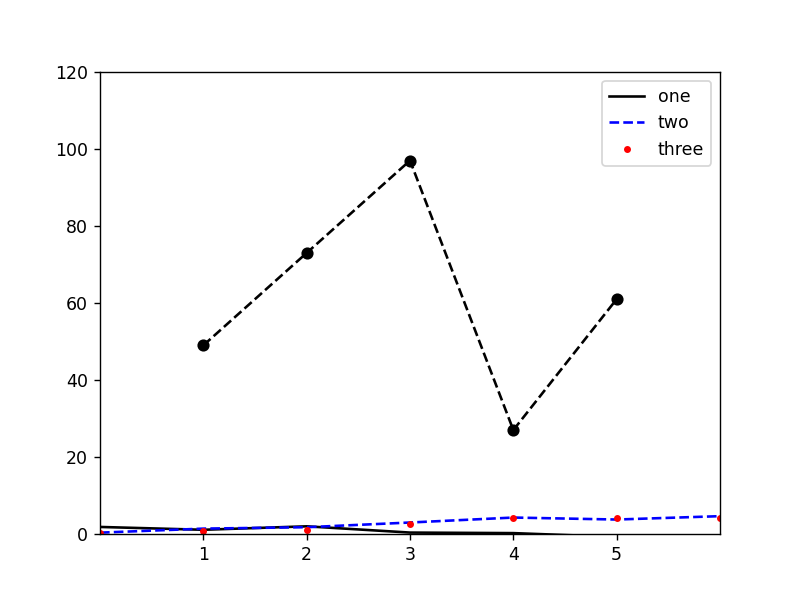

In [74]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

In [75]:
ax.plot(np.random.randn(1000).cumsum(), 'k', label='one')
ax.plot(np.random.randn(1000).cumsum(), 'b--', label='two')
ax.plot(np.random.randn(1000).cumsum(), 'r.', label='three')

In [76]:
# 범례 표시하기
ax.legend(loc='best')
# loc는 범례가 위치할 곳을 의미한다. best를 주게 되면 현재 그래프에서 최적의 위치를 자동으로 찾는다.

**x축 범위 및 y축 범위 수정하기**

In [77]:
ax.get_xlim()
# 현재 그래프의 x축 범위를 가져온다.

(-49.95, 1048.95)

In [78]:
# 이를 변경하려면,
ax.set_xlim([100,900])

(100.0, 900.0)

In [79]:
ax.set_ylim([-100,100])

(-100.0, 100.0)

# 3. Matplotlib을 이용한 데이터시각화 맛보기

In [80]:
battles = pd.read_csv('game-of-thrones/battles.csv', sep=',')
deaths = pd.read_csv('game-of-thrones/character-deaths.csv', sep=',')

In [81]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [82]:
battles.columns

Index(['name', 'year', 'battle_number', 'attacker_king', 'defender_king',
       'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region', 'note'],
      dtype='object')

In [83]:
battles.shape

(38, 25)

In [84]:
deaths.shape

(917, 13)

In [85]:
deaths.columns

Index(['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter',
       'Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
       'DwD'],
      dtype='object')

In [86]:
deaths.head()

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


In [87]:
book_nums_to_death_count = deaths['Book of Death'].value_counts().sort_index()
book_nums_to_death_count

1.0    49
2.0    73
3.0    97
4.0    27
5.0    61
Name: Book of Death, dtype: int64

In [88]:
ax1 = book_nums_to_death_count.plot(color = 'k', marker='o', linestyle='--')

In [89]:
# 모양 가다듬기
ax1.set_xticks(np.arange(1,6))

In [90]:
ax1.set_xlim([0,6])
ax1.set_ylim([0,120])

(0.0, 120.0)

In [91]:
battles = battles.set_index(['name'])

In [92]:
battles.head()

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


In [93]:
large_battle_mask = battles['attacker_size'] + battles['defender_size'] > 10000

In [94]:
large_battles = battles.loc[large_battle_mask, ['attacker_size', 'defender_size']]

In [95]:
large_battles.shape

(10, 2)

In [96]:
large_battles

,attacker_size,defender_size
name,,
Battle of the Golden Tooth,15000.0,4000.0
Battle of Riverrun,15000.0,10000.0
Battle of the Green Fork,18000.0,20000.0
Battle of the Camps,6000.0,12625.0
Battle of Oxcross,6000.0,10000.0
Siege of Storm's End,5000.0,20000.0
Battle of the Fords,20000.0,10000.0
Battle of the Blackwater,21000.0,7250.0
Battle of Castle Black,100000.0,1240.0


<IPython.core.display.Javascript object>


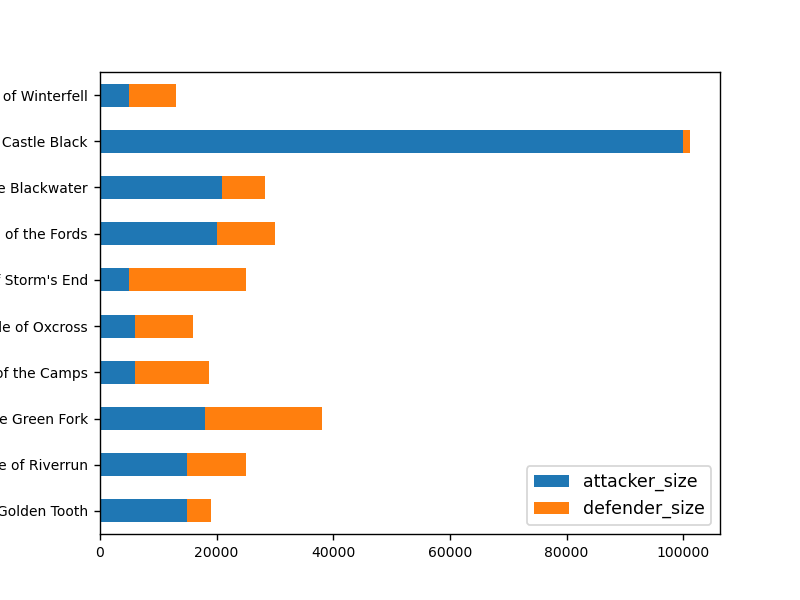

In [97]:
ax2 = large_battles.plot(kind='barh', stacked=True, fontsize=8)

In [98]:
large_battles['attacker_pcts'] = large_battles['attacker_size'] / (large_battles['attacker_size'] + large_battles['defender_size'])

In [99]:
large_battles['defender_pcts'] = large_battles['defender_size'] / (large_battles['attacker_size'] + large_battles['defender_size'])

In [100]:
large_battles

,attacker_size,defender_size,attacker_pcts,defender_pcts
name,,,,
Battle of the Golden Tooth,15000.0,4000.0,0.789474,0.210526
Battle of Riverrun,15000.0,10000.0,0.600000,0.400000
Battle of the Green Fork,18000.0,20000.0,0.473684,0.526316
Battle of the Camps,6000.0,12625.0,0.322148,0.677852
Battle of Oxcross,6000.0,10000.0,0.375000,0.625000
Siege of Storm's End,5000.0,20000.0,0.200000,0.800000
Battle of the Fords,20000.0,10000.0,0.666667,0.333333
Battle of the Blackwater,21000.0,7250.0,0.743363,0.256637
Battle of Castle Black,100000.0,1240.0,0.987752,0.012248


<IPython.core.display.Javascript object>


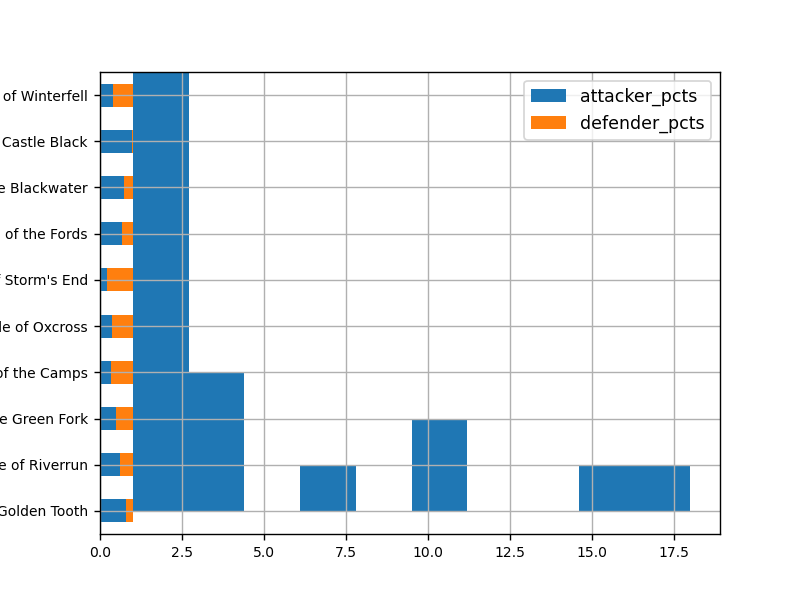

In [101]:
ax3 = large_battles[['attacker_pcts', 'defender_pcts']].plot(kind='barh', stacked=True, fontsize=8)

In [102]:
battles

,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
name,,,,,,,,,,,,,,,,,,,,,
Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,NaN,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,NaN,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,NaN,NaN,Lannister,NaN,...,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN
Battle of the Camps,298,6,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,NaN,NaN,Lannister,NaN,...,0.0,0.0,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",1.0,Riverrun,The Riverlands,NaN
Sack of Darry,298,7,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Darry,NaN,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
Battle of Moat Cailin,299,8,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,NaN,NaN,Victarion Greyjoy,NaN,1.0,Moat Cailin,The North,NaN
Battle of Deepwood Motte,299,9,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,NaN,NaN,Stark,NaN,...,0.0,0.0,1000.0,NaN,Asha Greyjoy,NaN,1.0,Deepwood Motte,The North,NaN


In [103]:
col_names = battles.columns[4:12]
col_names

Index(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1',
       'defender_2', 'defender_3', 'defender_4'],
      dtype='object')

In [104]:
# 각 가문이 얼마나 전투에 참여했는지 보기위해 먼저 col_names를 가져왔다.
# 이에 대해서 unique 처리를 하려고하는데, 이때 NaN값이 있으면 오류가 발생하므로 이를 먼저 처리한다.
# NaN을 None이라는 문자열로 대체할 것
house_names = battles[col_names].fillna("None").values

In [105]:
house_names[:5]

array([['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Baratheon', 'None', 'None',
        'None'],
       ['Lannister', 'None', 'None', 'None', 'Tully', 'None', 'None',
        'None'],
       ['Stark', 'None', 'None', 'None', 'Lannister', 'None', 'None',
        'None'],
       ['Stark', 'Tully', 'None', 'None', 'Lannister', 'None', 'None',
        'None']], dtype=object)

In [106]:
house_names = np.unique(house_names)
house_names

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'None', 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [107]:
house_names = np.unique(house_names)
house_names

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'None', 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [108]:
house_names = house_names[house_names != 'None']
house_names

array(['Baratheon', 'Blackwood', 'Bolton', 'Bracken', 'Brave Companions',
       'Brotherhood without Banners', 'Darry', 'Free folk', 'Frey',
       'Giants', 'Glover', 'Greyjoy', 'Karstark', 'Lannister',
       'Mallister', 'Mormont', "Night's Watch", 'Stark', 'Thenns',
       'Tully', 'Tyrell'], dtype=object)

In [109]:
houses_to_battle_counts = pd.Series(0, index=house_names)
houses_to_battle_counts

Baratheon                      0
Blackwood                      0
Bolton                         0
Bracken                        0
Brave Companions               0
Brotherhood without Banners    0
Darry                          0
Free folk                      0
Frey                           0
Giants                         0
Glover                         0
Greyjoy                        0
Karstark                       0
Lannister                      0
Mallister                      0
Mormont                        0
Night's Watch                  0
Stark                          0
Thenns                         0
Tully                          0
Tyrell                         0
dtype: int64

In [110]:
for col in col_names:
    houses_to_battle_counts = houses_to_battle_counts.add(battles[col].value_counts(), fill_value = 0)

In [111]:
houses_to_battle_counts

Baratheon                      11.0
Blackwood                       1.0
Bolton                          4.0
Bracken                         1.0
Brave Companions                3.0
Brotherhood without Banners     1.0
Darry                           2.0
Free folk                       1.0
Frey                            4.0
Giants                          1.0
Glover                          2.0
Greyjoy                        11.0
Karstark                        2.0
Lannister                      18.0
Mallister                       1.0
Mormont                         2.0
Night's Watch                   1.0
Stark                          16.0
Thenns                          1.0
Tully                           7.0
Tyrell                          2.0
dtype: float64

In [112]:
ax4 = houses_to_battle_counts.hist(bins=10)

In [113]:
ax4